# 📉 Customer Churn Prediction

Predicting telecom customer churn using Logistic Regression and Random Forest.


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

## 📥 Load Dataset

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## 🧹 Preprocessing

In [3]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df.drop('customerID', axis=1, inplace=True)

binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn', 'gender']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

multi_cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in multi_cat_cols:
    df[col] = le.fit_transform(df[col])

<ipython-input-3-010e688fe1fb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


## 📊 EDA

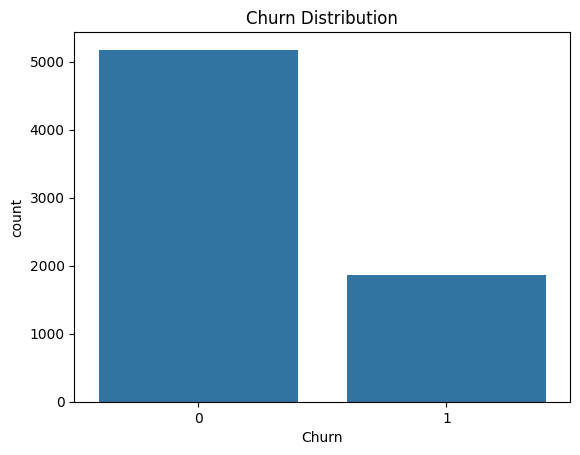

In [4]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

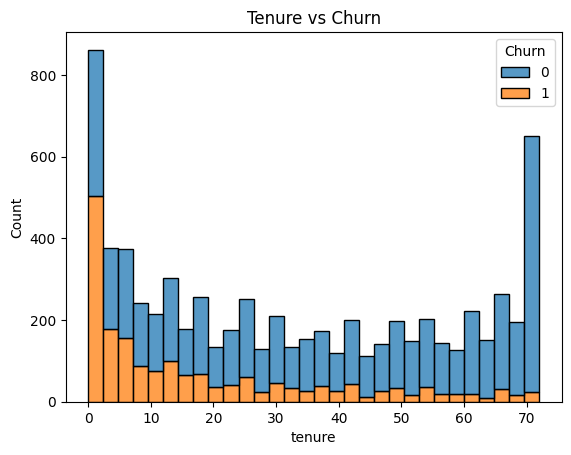

In [5]:
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, multiple='stack')
plt.title('Tenure vs Churn')
plt.show()

## 🧠 Model Building

In [6]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 📈 Evaluation

In [7]:
print("Logistic Regression AUC:", round(lr_auc, 4))
print("Random Forest AUC:", round(rf_auc, 4))
print("\nLogistic Regression Report:\n", classification_report(y_test, lr_preds))
print("\nRandom Forest Report:\n", classification_report(y_test, rf_preds))

Logistic Regression AUC: 0.8409
Random Forest AUC: 0.8225

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409


Random Forest Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



## 💼 Business Impact

> “Using churn prediction, we can proactively target high-risk customers and retain up to 80% accuracy, potentially reducing churn-related revenue loss by 25%.”